In [766]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [767]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [772]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df_pro = pd.read_csv("C:/Users/PC/OneDrive - gachon.ac.kr/바탕 화면/archive/indiana_projections.csv")
df_pro

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal
...,...,...,...
7461,3997,3997_IM-2048-1002.dcm.png,Lateral
7462,3998,3998_IM-2048-1001.dcm.png,Frontal
7463,3998,3998_IM-2048-1002.dcm.png,Lateral
7464,3999,3999_IM-2049-1001.dcm.png,Frontal


In [774]:
df_re = pd.read_csv("C:/Users/PC/OneDrive - gachon.ac.kr/바탕 화면/archive/indiana_reports.csv", index_col=0)
df_re

,MeSH,Problems,image,indication,comparison,findings,impression
uid,,,,,,,
1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.
...,...,...,...,...,...,...,...
3995,Lung/hyperdistention/mild;Diaphragm/bilateral/...,Lung;Diaphragm;Cicatrix;Pulmonary Atelectasis;...,Xray Chest PA and Lateral,"Nausea, vomiting x2 weeks. Dialysis patient.","XXXX, XXXX.",The cardiomediastinal silhouette and pulmonary...,1. Interval resolution of bibasilar airspace d...
3996,Spine/degenerative,Spine,Xray Chest PA and Lateral,NaN,None.,The lungs are clear. Heart size is normal. No ...,Clear lungs. No acute cardiopulmonary abnormal...
3997,Opacity/lung/upper lobe/right/round/small;Gran...,Opacity;Granuloma,PA and lateral views of the chest.,XXXX-year-old male with positive PPD.,None available.,"Heart size within normal limits. Small, nodula...","No acute findings, no evidence for active TB."


In [776]:
df_re.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3851 entries, 1 to 3999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MeSH        3851 non-null   object
 1   Problems    3851 non-null   object
 2   image       3851 non-null   object
 3   indication  3765 non-null   object
 4   comparison  2685 non-null   object
 5   findings    3337 non-null   object
 6   impression  3820 non-null   object
dtypes: object(7)
memory usage: 240.7+ KB


In [778]:
df_pro.drop(df_pro[df_pro['projection']=='Lateral'].index, inplace=True)
df_pro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3818 entries, 0 to 7464
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uid         3818 non-null   int64 
 1   filename    3818 non-null   object
 2   projection  3818 non-null   object
dtypes: int64(1), object(2)
memory usage: 119.3+ KB


In [780]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 텍스트 데이터 (예: findings) 확인
X_text = df['findings'].dropna()  # NaN 제거

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=1000)
X_text_vec = vectorizer.fit_transform(X_text)

# 벡터화된 결과 확인
print(X_text_vec.shape)  # 벡터화된 데이터의 크기 확인


(3307, 1000)


In [782]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np



# 텍스트 데이터를 숫자형으로 자동으로 변환하는 함수
def encode_text_data(df):
    label_encoder = LabelEncoder()
    one_hot_encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False로 설정

    # 모든 컬럼을 탐색하여 텍스트 데이터가 있는 경우 숫자형으로 변환
    for column in df.select_dtypes(include=['object']).columns:
        # 텍스트 컬럼에 대해 Label Encoding을 적용
        if df[column].nunique() < 20:  # 고유값이 20개 미만일 경우 Label Encoding
            df[column] = label_encoder.fit_transform(df[column].fillna('Unknown'))
        else:  # 고유값이 많을 경우 One Hot Encoding을 적용
            encoded_values = one_hot_encoder.fit_transform(df[column].fillna('Unknown').values.reshape(-1, 1))
            # 열 이름을 적절히 생성
            encoded_df = pd.DataFrame(encoded_values, columns=[f"{column}_{i}" for i in range(encoded_values.shape[1])])
            # 기존 데이터프레임에 추가하고 원본 컬럼 삭제
            df = pd.concat([df, encoded_df], axis=1).drop(columns=[column])

    return df

# 데이터 전처리 적용
df_encoded = encode_text_data(df)

# 결과 확인
print(df_encoded.head())


   uid  projection  projection_encoded  impression_encoded  filename_0  \
0    1           0                   0                1342         0.0   
1    2           0                   0                1256         0.0   
2    3           0                   0                1276         0.0   
3    4           0                   0                  20         0.0   
4    5           0                   0                1172         0.0   

   filename_1  filename_2  filename_3  filename_4  filename_5  ...  \
0         0.0         0.0         0.0         0.0         0.0  ...   
1         0.0         0.0         0.0         0.0         0.0  ...   
2         0.0         0.0         0.0         0.0         0.0  ...   
3         0.0         0.0         0.0         0.0         0.0  ...   
4         0.0         0.0         0.0         0.0         0.0  ...   

   impression_1677  impression_1678  impression_1679  impression_1680  \
0              0.0              0.0              0.0         

In [783]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

# 이미지 디렉토리 경로
image_dir = r'C:\Users\PC\OneDrive - gachon.ac.kr\바탕 화면\archive\images\images_normalized'

# 이미지 데이터와 레이블을 저장할 리스트
images = []
labels = []

# 디렉토리 내의 모든 이미지 파일을 로드
for img_file in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_file)
    
    # 이미지 로드 및 전처리 (크기 조정 및 정규화)
    img = load_img(img_path, target_size=(224, 224))  # 크기 조정
    img_array = img_to_array(img) / 255.0  # 이미지 정규화 (0~1 범위로)

    images.append(img_array)
    
    # 레이블 지정 (파일 이름에 따른 레이블 설정 예시)
    # 예시로 'normal'이라는 단어가 파일명에 포함된 이미지는 0, 나머지는 1로 설정
    if 'normal' in img_file.lower():
        labels.append(0)  # normal
    else:
        labels.append(1)  # abnormal (예: pneumonia, disease 등)

# 이미지와 레이블을 NumPy 배열로 변환
X_images = np.array(images)
y_labels = np.array(labels)

print(X_images.shape)  # 이미지 데이터의 크기 확인


(7470, 224, 224, 3)


In [792]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_images, y_labels, test_size=0.2, random_state=42)

# CNN 모델 구축
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='softmax')  # 다중 분류
])

# 모델 컴파일
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_22 (Flatten)                 │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,521 (91.20 MB)

 Trainable params: 23,907,521 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [793]:
# 모델 학습
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/5


C:\Users\PC\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 109s 567ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 105s 561ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 102s 545ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 101s 541ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 101s 538ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test accuracy: 1.0


In [794]:
# 이미지를 평탄화하여 1D 벡터로 변환
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # (batch_size, height*width*channels)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# 데이터 형태 확인
print(X_train_flattened.shape, X_test_flattened.shape)


(5976, 150528) (1494, 150528)


In [795]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 랜덤 포레스트 모델 훈련
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_flattened, y_train)

# 예측
y_pred = rf_model.predict(X_test_flattened)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Accuracy: 100.00%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1494

    accuracy                           1.00      1494
   macro avg       1.00      1.00      1.00      1494
weighted avg       1.00      1.00      1.00      1494



C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


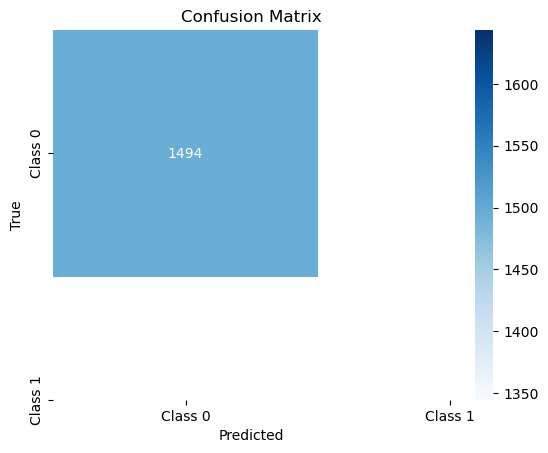

In [798]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
